<a href="https://colab.research.google.com/github/ohikendoit/snippet/blob/main/PYDA100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wikibook/pyda100.git

Cloning into 'pyda100'...
remote: Enumerating objects: 535, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 535 (delta 17), reused 26 (delta 11), pack-reused 489
Receiving objects: 100% (535/535), 477.22 MiB | 20.93 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Updating files: 100% (478/478), done.


In [2]:
#001

import pandas as pd
customer_master = pd.read_csv('/content/pyda100/1장/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [3]:
item_master = pd.read_csv('/content/pyda100/1장/item_master.csv')
transaction_1 = pd.read_csv('/content/pyda100/1장/transaction_1.csv')
transaction_2 = pd.read_csv('/content/pyda100/1장/transaction_2.csv')
transaction_detail_1 = pd.read_csv('/content/pyda100/1장/transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('/content/pyda100/1장/transaction_detail_2.csv')

In [4]:
#002

transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [5]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [6]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [7]:
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


In [8]:
#003

join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [9]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


In [10]:
#004

join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [11]:
#005

join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["quantity", "item_price", "price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [12]:
#006

print(join_data["price"].sum())
print(transaction["price"].sum())
join_data["price"].sum() == transaction["price"].sum()

971135000
971135000


True

In [13]:
#007

join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [14]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [15]:
#008

join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [16]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [17]:
join_data.groupby("payment_month").sum()["price"]

<ipython-input-17-4c1f7d0c6385>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  join_data.groupby("payment_month").sum()["price"]


payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [18]:
#009

join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]

<ipython-input-18-a5adab39494a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]


price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [19]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [20]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values='price', aggfunc=['mean', 'sum'])

mean                                               \
payment_month         201902         201903         201904         201905   
item_name                                                                   
PC-A            72305.389222   71428.571429   70189.701897   68646.408840   
PC-B           106518.987342  107142.857143  108611.111111  105103.734440   
PC-C           130263.157895  133426.573427  130714.285714  133246.753247   
PC-D           191042.944785  185179.856115  191338.582677  187826.086957   
PC-E           215287.769784  215656.565657  213453.947368  213818.181818   

                                                  sum                      \
payment_month         201906         201907    201902    201903    201904   
item_name                                                                   
PC-A            73239.436620   70334.261838  24150000  26000000  25900000   
PC-B           103318.965517  106490.566038  25245000  25500000  23460000   
PC-C           130778.443114  134068.965517  19800000  19080000  21960000   
PC-D           192000.000000  186428.571429  31140000  25740000  24300000   
PC-E           212818.791946  214401.197605  59850000  64050000  64890000   

                                             
payment_month    201905    201906    201907  
item_name                                    
PC-A           24850000  26000000  25250000  
PC-B           25330000  23970000  28220000  
PC-C           20520000  21840000  19440000  
PC-D           25920000  28800000  26100000  
PC-E           58800000  63420000  71610000

In [21]:
#10

graph_data = pd.pivot_table (join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


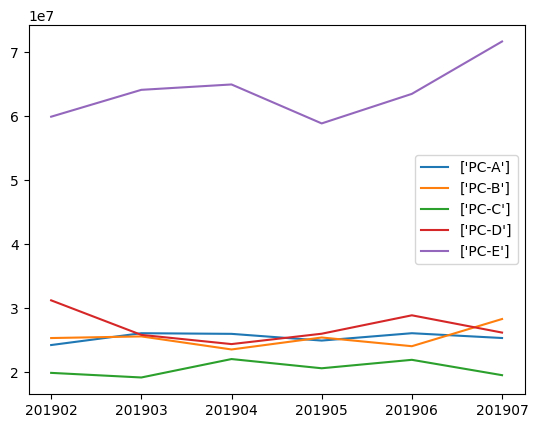

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data['PC-A'], label=['PC-A'])
plt.plot(list(graph_data.index), graph_data['PC-B'], label=['PC-B'])
plt.plot(list(graph_data.index), graph_data['PC-C'], label=['PC-C'])
plt.plot(list(graph_data.index), graph_data['PC-D'], label=['PC-D'])
plt.plot(list(graph_data.index), graph_data['PC-E'], label=['PC-E'])
plt.legend()

In [23]:
graph_data2 = pd.pivot_table(join_data, index='item_name', columns='payment_month', values='price', aggfunc='sum')
graph_data2

payment_month,201902,201903,201904,201905,201906,201907
item_name,,,,,,
PC-A,24150000,26000000,25900000,24850000,26000000,25250000
PC-B,25245000,25500000,23460000,25330000,23970000,28220000
PC-C,19800000,19080000,21960000,20520000,21840000,19440000
PC-D,31140000,25740000,24300000,25920000,28800000,26100000
PC-E,59850000,64050000,64890000,58800000,63420000,71610000


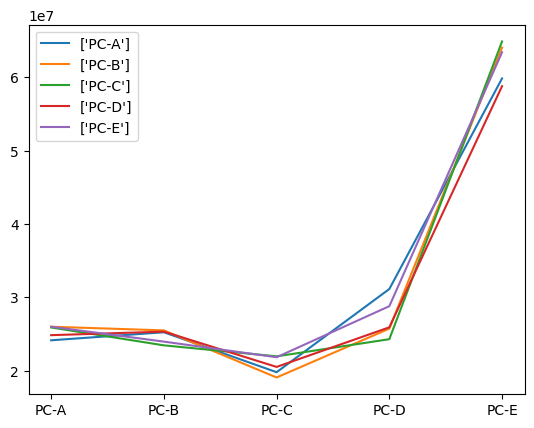

In [24]:
plt.plot(list(graph_data2.index), graph_data2['201902'], label=['PC-A'])
plt.plot(list(graph_data2.index), graph_data2['201903'], label=['PC-B'])
plt.plot(list(graph_data2.index), graph_data2['201904'], label=['PC-C'])
plt.plot(list(graph_data2.index), graph_data2['201905'], label=['PC-D'])
plt.plot(list(graph_data2.index), graph_data2['201906'], label=['PC-E'])
plt.legend()

In [25]:
#11

import pandas as pd
uriage_data = pd.read_csv("/content/pyda100/2장/uriage.csv")
uriage_data.head

kokyaku_data = pd.read_excel("/content/pyda100/2장/kokyaku_daicho.xlsx")
kokyaku_data.head

<bound method NDFrame.head of      고객이름  지역                  등록일
0    김 현성  H시  2018-01-04 00:00:00
1    김 도윤  E시                42782
2    김 지한  A시  2018-01-07 00:00:00
3    김 하윤  F시                42872
4    김 시온  E시                43127
..    ...  ..                  ...
195  김 재희  G시  2017-06-20 00:00:00
196  김 도영  E시  2018-06-20 00:00:00
197  김 이안  F시  2017-04-29 00:00:00
198  김 시현  H시  2019-04-19 00:00:00
199  김 서우  D시  2019-04-23 00:00:00

[200 rows x 3 columns]>

In [26]:
#12

uriage_data["item_name"].head()
uriage_data["item_price"].head()

0     100.0
1       NaN
2       NaN
3    2600.0
4       NaN
Name: item_price, dtype: float64

In [27]:
uriage_data.head(5)

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [28]:
#13

uriage_data["purchase_date"] = pd.to_datetime(uriage_data["purchase_date"])
uriage_data["purchase_month"] = uriage_data["purchase_date"].dt.strftime("%Y%m")
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [29]:
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1400,0,0,0,0,0,0,0,0,0,...,1100,1200,1500,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,2400,0,0,0,...,0,0,0,0,0,1900,2000,2200,0,0
201903,0,500,1300,1600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,2300,0,1700,...,0,0,0,0,0,1900,0,0,0,0
201905,0,0,0,0,1900,0,0,0,0,0,...,0,1200,0,0,0,0,0,0,0,2500
201906,0,0,0,0,0,2300,0,0,0,0,...,0,0,0,1600,0,0,0,0,2400,0
201907,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,1800,0,0,0,0,0


In [30]:
#14

print(len(pd.unique(uriage_data.item_name)))
uriage_data.item_name

99


0         상품A
1       상 품 S
2       상 품 a
3         상품Z
4         상품a
        ...  
2994      상품Y
2995      상품M
2996      상품Q
2997      상품H
2998      상품D
Name: item_name, Length: 2999, dtype: object

In [31]:
uriage_data["item_name"] = uriage_data["item_name"].str.upper()
uriage_data["item_name"] = uriage_data["item_name"].str.replace("  ", "")
uriage_data["item_name"] = uriage_data["item_name"].str.replace(" ", "")
uriage_data.sort_values(by=["item_name"], ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1748,2019-05-19 20:22:00,상품A,100.0,김시훈,201905
223,2019-06-25 08:13:00,상품A,100.0,김유진,201906
1742,2019-06-13 16:03:00,상품A,100.0,김건희,201906
1738,2019-02-10 00:28:00,상품A,100.0,김하랑,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,NaN,김동욱,201904
2881,2019-04-30 14:21:00,상품Y,NaN,김하준,201904
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준,201901
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현,201905


In [32]:
print(len(pd.unique(uriage_data["item_name"])))
print(pd.unique(uriage_data["item_name"]))

26
['상품A' '상품S' '상품Z' '상품V' '상품O' '상품U' '상품L' '상품C' '상품I' '상품R' '상품X' '상품G'
 '상품P' '상품Q' '상품Y' '상품N' '상품W' '상품E' '상품K' '상품B' '상품F' '상품D' '상품M' '상품H'
 '상품T' '상품J']


In [33]:
#15

uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [34]:
flg_is_null = uriage_data["item_price"].isnull()

for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):
  price = uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"] == trg), "item_price"].max()
  uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"] == trg)] = price

uriage_data.head()

<ipython-input-34-71f362d74523>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"] == trg)] = price


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상품S,1900.0,김우찬,201907
2,2019-05-11 19:42:00,상품A,100.0,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품A,100.0,김강현,201904


In [35]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price        False
customer_name     False
purchase_month    False
dtype: bool

In [36]:
for trg in list(uriage_data["item_name"].sort_values().unique()):
  print(trg + "의 최고가: " + str(uriage_data.loc[uriage_data["item_name"] == trg]["item_price"].max())
   + "의 최저가: " + str(uriage_data.loc[uriage_data["item_name"] == trg]["item_price"].min()))

상품A의 최고가: 100.0의 최저가: 100.0
상품B의 최고가: 200.0의 최저가: 200.0
상품C의 최고가: 300.0의 최저가: 300.0
상품D의 최고가: 400.0의 최저가: 400.0
상품E의 최고가: 500.0의 최저가: 500.0
상품F의 최고가: 600.0의 최저가: 600.0
상품G의 최고가: 700.0의 최저가: 700.0
상품H의 최고가: 800.0의 최저가: 800.0
상품I의 최고가: 900.0의 최저가: 900.0
상품J의 최고가: 1000.0의 최저가: 1000.0
상품K의 최고가: 1100.0의 최저가: 1100.0
상품L의 최고가: 1200.0의 최저가: 1200.0
상품M의 최고가: 1300.0의 최저가: 1300.0
상품N의 최고가: 1400.0의 최저가: 1400.0
상품O의 최고가: 1500.0의 최저가: 1500.0
상품P의 최고가: 1600.0의 최저가: 1600.0
상품Q의 최고가: 1700.0의 최저가: 1700.0
상품R의 최고가: 1800.0의 최저가: 1800.0
상품S의 최고가: 1900.0의 최저가: 1900.0
상품T의 최고가: 2000.0의 최저가: 2000.0
상품U의 최고가: 2100.0의 최저가: 2100.0
상품V의 최고가: 2200.0의 최저가: 2200.0
상품W의 최고가: 2300.0의 최저가: 2300.0
상품X의 최고가: 2400.0의 최저가: 2400.0
상품Y의 최고가: 2500.0의 최저가: 2500.0
상품Z의 최고가: 2600.0의 최저가: 2600.0


In [37]:
#16

kokyaku_data["고객이름"].head()

0    김 현성
1    김 도윤
2    김 지한
3    김 하윤
4    김 시온
Name: 고객이름, dtype: object

In [38]:
uriage_data["customer_name"].head()

0    김가온
1    김우찬
2    김유찬
3    김재현
4    김강현
Name: customer_name, dtype: object

In [39]:
kokyaku_data["고객이름"] = kokyaku_data["고객이름"].str.replace("  ", "")
kokyaku_data["고객이름"] = kokyaku_data["고객이름"].str.replace(" ", "")
kokyaku_data["고객이름"].head()

0    김현성
1    김도윤
2    김지한
3    김하윤
4    김시온
Name: 고객이름, dtype: object

In [40]:
#17

flg_is_serial = kokyaku_data["등록일"].astype("str").str.isdigit()
flg_is_serial.sum()

kokyaku_data.loc[flg_is_serial]

,고객이름,지역,등록일
1,김도윤,E시,42782
3,김하윤,F시,42872
4,김시온,E시,43127
21,김동우,A시,42920
27,김서준,C시,42901
47,김태민,H시,42741
49,김정원,H시,42929
53,김주영,E시,42833
76,김지성,A시,43188
80,김지후,D시,43110


In [41]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, "등록일"].astype("float"), unit="D") + pd.to_datetime("1900/01/01")
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 등록일, dtype: datetime64[ns]

In [42]:
fromString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial, "등록일"])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 등록일, Length: 178, dtype: datetime64[ns]

In [43]:
kokyaku_data["등록일"] = pd.concat([fromSerial, fromString])
kokyaku_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-18
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-19
4,김시온,E시,2018-01-29
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


In [44]:
kokyaku_data["등록연월"] = kokyaku_data["등록일"].dt.strftime("%Y%m")
rslt = kokyaku_data.groupby("등록연월").count()["고객이름"]
print(rslt)
print(len(kokyaku_data))

등록연월
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 고객이름, dtype: int64
200


In [45]:
flg_is_serial = kokyaku_data["등록일"].astype("str").str.isdigit()
flg_is_serial.sum()

0

In [46]:
#18

join_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="고객이름", how="left")
join_data = join_data.drop("customer_name", axis=1)
join_data

,purchase_date,item_name,item_price,purchase_month,고객이름,지역,등록일,등록연월
0,2019-06-13 18:02:00,상품A,100.0,201906,김가온,C시,2017-01-26,201701
1,2019-07-13 13:05:00,상품S,1900.0,201907,김우찬,C시,2018-04-07,201804
2,2019-05-11 19:42:00,상품A,100.0,201905,김유찬,A시,2018-06-19,201806
3,2019-02-12 23:40:00,상품Z,2600.0,201902,김재현,D시,2018-07-22,201807
4,2019-04-22 03:09:00,상품A,100.0,201904,김강현,D시,2017-06-07,201706
...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품Y,2500.0,201902,김정민,B시,2017-07-01,201707
2995,2019-06-22 04:03:00,상품M,1300.0,201906,김재원,E시,2018-03-31,201803
2996,2019-03-29 11:14:00,상품Q,1700.0,201903,김지율,B시,2017-03-15,201703
2997,2019-07-14 12:56:00,상품H,800.0,201907,김승주,E시,2018-07-15,201807


In [47]:
#19

dump_data = join_data[["purchase_date", "purchase_month", "item_name", "item_price", "고객이름", "지역", "등록일"]]
dump_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26
1,2019-07-13 13:05:00,201907,상품S,1900.0,김우찬,C시,2018-04-07
2,2019-05-11 19:42:00,201905,상품A,100.0,김유찬,A시,2018-06-19
3,2019-02-12 23:40:00,201902,상품Z,2600.0,김재현,D시,2018-07-22
4,2019-04-22 03:09:00,201904,상품A,100.0,김강현,D시,2017-06-07
...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,201902,상품Y,2500.0,김정민,B시,2017-07-01
2995,2019-06-22 04:03:00,201906,상품M,1300.0,김재원,E시,2018-03-31
2996,2019-03-29 11:14:00,201903,상품Q,1700.0,김지율,B시,2017-03-15
2997,2019-07-14 12:56:00,201907,상품H,800.0,김승주,E시,2018-07-15


In [48]:
dump_data.to_csv("dump_data.csv", index=False)

In [49]:
#20

import_data = pd.read_csv("dump_data.csv")
import_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26
1,2019-07-13 13:05:00,201907,상품S,1900.0,김우찬,C시,2018-04-07
2,2019-05-11 19:42:00,201905,상품A,100.0,김유찬,A시,2018-06-19
3,2019-02-12 23:40:00,201902,상품Z,2600.0,김재현,D시,2018-07-22
4,2019-04-22 03:09:00,201904,상품A,100.0,김강현,D시,2017-06-07
...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,201902,상품Y,2500.0,김정민,B시,2017-07-01
2995,2019-06-22 04:03:00,201906,상품M,1300.0,김재원,E시,2018-03-31
2996,2019-03-29 11:14:00,201903,상품Q,1700.0,김지율,B시,2017-03-15
2997,2019-07-14 12:56:00,201907,상품H,800.0,김승주,E시,2018-07-15


In [50]:
byItem = import_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
byItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [51]:
byPrice = import_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
byPrice

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
201902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,37400,39600,41800,46000,39900,48400,55200,38400,27500,2600
201903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,39100,28800,38000,24000,48300,39600,36800,50400,40000,0
201904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,34000,36000,30400,32000,23100,33000,32200,38400,50000,0
201905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,22100,39600,34200,32000,33600,19800,48300,38400,50000,0
201906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,25500,28800,39900,24000,37800,44000,39100,36000,32500,0
201907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [52]:
byCustomer = import_data.pivot_table(index="purchase_month", columns="고객이름", aggfunc="size", fill_value=0)
byCustomer

고객이름,김가온,김강민,김강현,김건우,김건희,김경민,김규민,김규현,김다온,김대현,...,김현수,김현승,김현우,김현준,김현진,김호준,정도형,정영훈,정우석,정준기
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,2,1,2,5,3,1,1,1,5,...,3,2,4,2,1,1,4,4,4,3
201902,3,1,4,3,3,5,2,3,1,5,...,5,3,7,0,0,1,2,0,2,2
201903,4,0,3,1,1,2,2,1,1,5,...,3,2,1,2,1,2,1,2,3,4
201904,1,0,3,0,2,1,2,6,2,4,...,0,4,3,1,1,2,2,4,3,1
201905,0,0,2,2,1,4,6,3,3,1,...,2,2,1,4,3,0,0,0,1,2
201906,5,0,3,0,2,1,6,1,1,1,...,2,4,1,0,4,2,2,0,0,2
201907,3,1,3,2,2,1,4,1,4,3,...,2,1,0,4,0,2,6,1,2,3


In [53]:
byRegion = import_data.pivot_table(index="purchase_month", columns="지역", aggfunc="size", fill_value=0)
byRegion

지역,A시,B시,C시,D시,E시,F시,G시,H시
purchase_month,,,,,,,,
201901,59,55,72,34,49,57,49,42
201902,71,46,65,48,61,52,43,63
201903,64,52,57,43,52,59,51,59
201904,64,48,54,45,48,58,40,52
201905,57,52,68,48,59,65,35,43
201906,53,47,61,30,51,51,58,58
201907,76,53,61,42,54,64,47,54


In [54]:
away_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="고객이름", how="right")
away_data[away_data["purchase_date"].isnull()][["고객이름", "등록일"]]

,고객이름,등록일
2999,김서우,2019-04-23


In [55]:
import pandas as pd

uselog = pd.read_csv('/content/pyda100/3장/use_log.csv')
customer = pd.read_csv('/content/pyda100/3장/customer_master.csv')
class_master = pd.read_csv('/content/pyda100/3장/class_master.csv')
campaign_master = pd.read_csv('/content/pyda100/3장/campaign_master.csv')

print(len(uselog))
print(len(customer_master))
print(len(class_master))
print(len(campaign_master))

197428
5000
3
3


In [56]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [57]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [58]:
class_master.head()

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [59]:
campaign_master.head()

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [60]:
#22

customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [61]:
print(len(customer) == len(customer_join))
customer_join.isnull().sum()

True


customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [62]:
#23

customer_join.groupby("class_name").count()["customer_id"]

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [63]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [64]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [65]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [66]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

1361


In [67]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반


In [68]:
#24

customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [69]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [70]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [71]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [72]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [73]:
#25

#월/고객 이용 횟수 집계 결과
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["연월", "customer_id"], as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)

del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [74]:
#고객별 월 이용 횟수 집계 결과
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [75]:
#26

#정기 이용 플래그 작성
#정기적이라는 것은 정의하는 방법에 따라 다르지만, 매주 같은 요일에 왔는지로 판단
#고객마다 월/요일별로 집계하고, 최댓값이 4 이상인 요일이 하나라도 있는 회원을 플래그

uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "연월", "weekday"], as_index=False).count()[["customer_id", "연월", "weekday", "log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [76]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"] < 4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [77]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반


In [78]:
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [79]:
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [80]:
#27

customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [81]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [82]:
#28

from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0

for i in range (len(customer_join)):
  delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months

customer_join.head()

<ipython-input-82-f142521c1f5c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [83]:
#29

customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [84]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

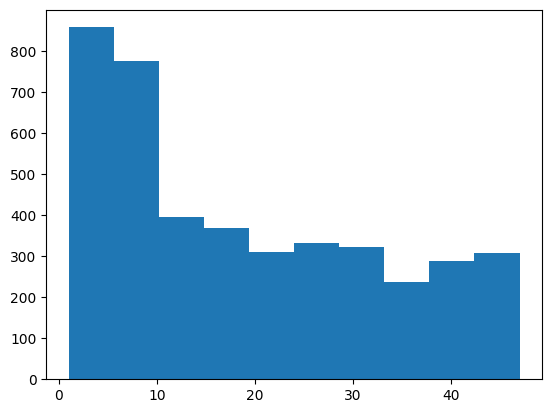

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

In [86]:
#30

customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [87]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [88]:
customer_join.to_csv("customer_join.csv", index=False)

In [91]:
#31

import pandas as pd

uselog = pd.read_csv('/content/pyda100/3장/use_log.csv')
uselog.isnull().sum()
customer = pd.read_csv('/content/customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [92]:
#32

customer_clustering = customer[["mean", "median", "max", "min", "membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 2 3 0]


<ipython-input-93-603608940e90>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering["cluster"] = clusters.labels_


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [95]:
#33

customer_clustering.columns = ["월평균값", "월중앙값", "월최댓값", "월최솟값", "회원기간", "cluster"]
customer_clustering.groupby("cluster").count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [97]:
customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


In [100]:
#34

from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

In [101]:
pca_df.head()

,0,1,cluster
0,-0.819982,-1.959097,1
1,-0.707922,-1.799857,1
2,-1.061499,-1.659826,1
3,-1.160764,-1.810139,1
4,-2.017132,-1.670101,1


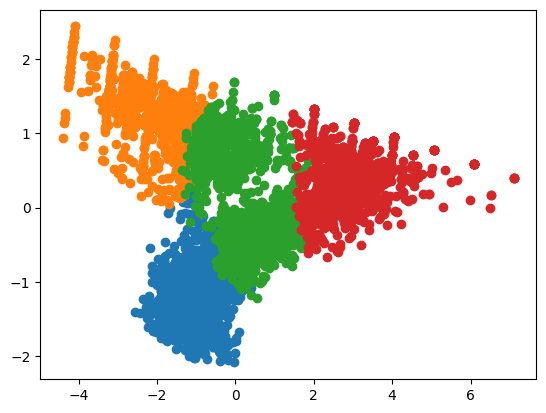

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering["cluster"].unique():
  tmp = pca_df.loc[pca_df["cluster"]==i]
  plt.scatter(tmp[0], tmp[1])

In [103]:
customer_clustering.head()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [104]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [105]:
#35

customer_clustering = pd.concat([customer_clustering, customer], axis=1)
customer_clustering.head()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.833333,5.0,8,2,47,1,OA832399,XXXX,C01,F,...,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,5.083333,5.0,7,3,47,1,PL270116,XXXXX,C01,M,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,4.583333,5.0,6,3,47,1,OA974876,XXXXX,C01,M,...,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,4.833333,4.5,7,2,47,1,HD024127,XXXXX,C01,F,...,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,3.916667,4.0,6,1,47,1,HD661448,XXXXX,C03,F,...,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [106]:
customer_clustering.groupby(["cluster", "is_deleted"], as_index=False).count()[["cluster", "is_deleted", "customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,821
1,0,1,19
2,1,0,1231
3,1,1,18
4,2,1,771
5,3,0,790
6,3,1,542


In [108]:
customer_clustering.groupby(["cluster", "routine_flg"], as_index=False).count()[["cluster", "routine_flg", "customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,52
1,0,1,788
2,1,0,2
3,1,1,1247
4,2,0,499
5,2,1,272
6,3,0,226
7,3,1,1106


In [109]:
#36

uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["연월", "customer_id"], as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [110]:
year_months = list(uselog_months["연월"].unique())
predict_data = pd.DataFrame()
for i in range(6, len(year_months)):
  tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]]
  tmp.rename(columns={"count":"count_pred"}, inplace=True)
  for j in range(1, 7):
    tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-j]]
    del tmp_before["연월"]
    tmp_before.rename(columns={"count": "count_{}".format(j-1)}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
  predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

<ipython-input-110-d7e15ba7bd44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.rename(columns={"count":"count_pred"}, inplace=True)
<ipython-input-110-d7e15ba7bd44>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={"count": "count_{}".format(j-1)}, inplace=True)
<ipython-input-110-d7e15ba7bd44>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={"count": "count_{}".format(j-1)}, 

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [111]:
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [112]:
#37

predict_data = pd.merge(predict_data, customer[["customer_id", "start_date"]], on="customer_id", how="left")
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [113]:
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01


In [114]:
from dateutil.relativedelta import relativedelta
predict_data["period"] = None
for i in range(len(predict_data)):
  delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
  predict_data["period"][i] = delta.years * 12 + delta.months
predict_data.head()

<ipython-input-114-547a8345a11c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["period"][i] = delta.years * 12 + delta.months


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [115]:
#38

predict_data = predict_data.loc[predict_data["start_date"] >= pd.to_datetime("20180401")]

from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()

X = predict_data[["count_0", "count_1", "count_2", "count_3", "count_4", "count_5", "period"]]
y = predict_data["count_pred"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)
model.fit(X_train, y_train)

LinearRegression()

In [116]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6072011869150501
0.6099788234862786


In [117]:
coef = pd.DataFrame({"features_name": X.columns, "coefficient": model.coef_})
coef

,features_name,coefficient
0,count_0,0.333185
1,count_1,0.197300
2,count_2,0.163037
3,count_3,0.193103
4,count_4,0.066701
5,count_5,0.070906
6,period,0.091041


In [120]:
#40

x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]
x_pred

[[3, 4, 4, 6, 8, 7, 8], [2, 2, 3, 3, 4, 6, 8]]

In [121]:
model.predict(x_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.80976437, 2.00192328])

In [122]:
uselog_months.to_csv("use_log_months.csv", index=False)